In [1]:
# for manupulations
import pandas as pd
import numpy as np
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
# for intractivity
from ipywidgets import interact

In [2]:
#lets read the dataset
data= pd.read_csv("data.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
#lets chack the shape of the dataset
data.shape

(2200, 8)

In [4]:
#lets chack the head of the dataset
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
#lets chack if there is any missing value present in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [6]:
# lets chack the crops present in this dataset
data['label'].value_counts()

chickpea       100
lentil         100
banana         100
mothbeans      100
jute           100
kidneybeans    100
pigeonpeas     100
watermelon     100
rice           100
mungbean       100
blackgram      100
muskmelon      100
coconut        100
pomegranate    100
mango          100
coffee         100
apple          100
maize          100
papaya         100
orange         100
grapes         100
cotton         100
Name: label, dtype: int64

In [7]:
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [8]:
#to know average climate and soil requirment means to find out avg nitrogen, phosphorus,potasium,rainfall,humidity ,phthese all requirment
# Lets chack the summary for all the crops
print("Average Ratio of Nitrogen in the soil: {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorous in the soil:{0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potasium in the soil:{0:.2f}".format(data['K'].mean()))
print("Average Temperature of Celsius:{0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in %:{0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil:{0:.2f}".format(data['ph'].mean()))
print("Average Rainfall:{0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the soil: 50.55
Average Ratio of Phosphorous in the soil:53.36
Average Ratio of Potasium in the soil:48.15
Average Temperature of Celsius:25.62
Average Relative Humidity in %:71.48
Average PH Value of the soil:6.47
Average Rainfall:103.46


Result show: the distribution of N,P,K in the soil is approx 50% , temperature 25%,RH 71%,ph 7, Rainfall 103

In [9]:
# lests chack the Summary Statistics for each of the Crops

@interact
def summary(crops = list(data['label'].value_counts().index)):
    x=data[data['label']==crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required:", x['N'].min())
    print("Average Nitrogen required:", x['N'].mean())
    print("Maximum Nitrogen required:", x['N'].max())
    print("-------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required:", x['P'].min())
    print("Average Phosphorous required:", x['P'].mean())
    print("Maximum Phosphorous required:", x['P'].max())
    print("-----------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required:", x['K'].min())
    print("Average Potassium required:", x['K'].mean())
    print("Maximum Potassium required:", x['K'].mean())
    print("----------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required:", x['temperature'].min())
    print("Average Temperature required:", x['temperature'].mean())
    print("Maximum Temperature required:", x['temperature'].mean())
    print("---------------------------------------------------------")
    print("Statistics for Relative Humidity")
    print("Minimum Relative Humidity:", x['humidity'].min())
    print("Average Relative Humidity:", x['humidity'].mean())
    print("Maximum Relative Humedity:", x['humidity'].max())
    print("--------------------------------------------------")
    print("Statistics for PH Value")
    print("Minimum PH Value required:", x['temperature'].min())
    print("Average PH Value required:", x['temperature'].mean())
    print("Maximum PH Value:", x['temperature'].max())

interactive(children=(Dropdown(description='crops', options=('chickpea', 'lentil', 'banana', 'mothbeans', 'jut…

In [10]:
# lets make this function more Intvitive

@interact
def compare(conditions = ['N','P','K', 'temperature', 'ph','humidity','rainfall']):
    print("Crops which required greater than average", conditions,'\n')
    print(data[data[conditions]> data[conditions].mean()]['label'].unique())
    print("---------------------------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['label'].unique())
    

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

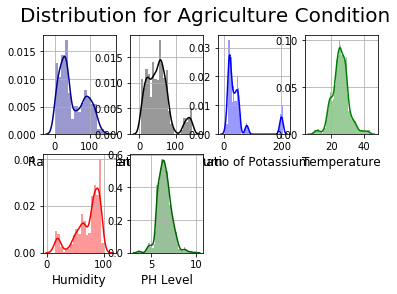

In [11]:
#distribution of each condition in crop
plt.subplot(2,4,1)
sns.distplot(data['N'], color='darkblue')
plt.xlabel("Ratio of Nitrogen", fontsize = 12)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'], color='black')
plt.xlabel("Ratio of Potassium", fontsize=12)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'], color= 'blue')
plt.xlabel("Ratio of Potassium", fontsize=12)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'], color='green')
plt.xlabel("Temperature", fontsize=12)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['humidity'], color='red')
plt.xlabel("Humidity", fontsize='12')
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['ph'], color='darkgreen')
plt.xlabel("PH Level", fontsize=12)
plt.grid()

plt.suptitle('Distribution for Agriculture Condition', fontsize=20)
plt.show()



In [12]:
## Lets find out some Interesting Facts

print("Some Intresting Patterns")
print("--------------------------")
print("Crops which requires very High Ratio of Nitrogen Content in Soil:", data[data['N']> 120]['label'].unique())
print("Crops which requires very High Ratio of Phosphorus Content in Soil:", data[data['P']> 100]['label'].unique())
print("Crops which requires very High Ratio of Potassium Content in Soil:", data[data['K']>200]['label'].unique())
print("Crops which requires very High Rainfall:", data[data['rainfall']>200]['label'].unique())
print("Crops which requires very High Temperature:", data[data['temperature']>40]['label'].unique())
print("Crops which requires very Low Temperature:", data[data['temperature']<10]['label'].unique())
print("Crops which requires very low Humidity:", data[data['humidity']<20]['label'].unique())
print("Crops which requires very low pH:", data[data['ph']<4]['label'].unique())
print("Crops which requires very High pH:", data[data['ph']>9]['label'].unique())

Some Intresting Patterns
--------------------------
Crops which requires very High Ratio of Nitrogen Content in Soil: ['cotton']
Crops which requires very High Ratio of Phosphorus Content in Soil: ['grapes' 'apple']
Crops which requires very High Ratio of Potassium Content in Soil: ['grapes' 'apple']
Crops which requires very High Rainfall: ['rice' 'papaya' 'coconut']
Crops which requires very High Temperature: ['grapes' 'papaya']
Crops which requires very Low Temperature: ['grapes']
Crops which requires very low Humidity: ['chickpea' 'kidneybeans']
Crops which requires very low pH: ['mothbeans']
Crops which requires very High pH: ['mothbeans']


In [13]:
## Lets understand which crops can only be Grown in Summer Season, Winter Season and Rainy Season
print("Summer Crops")
print(data[(data['temperature']>30) & (data['humidity']>50)]['label'].unique())
print("---------------------------")
print("Winter Crops ")
print(data[(data['temperature']<20)& (data['humidity']>30)]['label'].unique())
print("--------------------------")
print("Rainy Crops")
print(data[(data['rainfall']>200)&(data['humidity']>30)]['label'].unique())

Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'mango' 'grapes' 'orange' 'papaya']
---------------------------
Winter Crops 
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
--------------------------
Rainy Crops
['rice' 'papaya' 'coconut']


In [14]:
from sklearn.cluster import KMeans

# removing the labels column
x=data.drop(['label'], axis=1)

# selecting all the values of the data
x=x.values

#chacking the shape
print(x.shape)

(2200, 7)


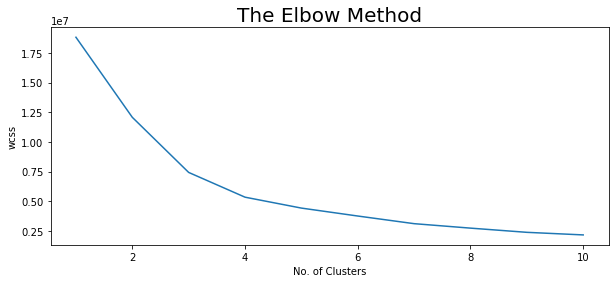

In [15]:
# lets determine the Optimum Number of Clusters within the Dataset

plt.rcParams['figure.figsize']=(10,4)

wcss=[]
for i in range(1,11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
    
    #lets plot the results
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [16]:
# lets implement the K Mean algorithm to perform Clustering analysis
km= KMeans(n_clusters = 4, init= 'k-means++', max_iter = 300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

# lets find out the Results
a = data['label']
y_means = pd.DataFrame(y_means)
z= pd.concat([y_means, a], axis=1)
z=z.rename(columns={0:'cluster'})

# lets check the Clusters of each Crops
print("Lets check the Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster']==0]['label'].unique())
print("--------------------------------------")
print("Crop in Second Cluster:", z[z['cluster']==1]['label'].unique())
print("-----------------------------------------")
print("Crop in Third Cluster:",z[z['cluster']==2]['label'].unique())
print("---------------------------------------------")
print("Crop in Forth Cluster:", z[z['cluster']==3]['label'].unique())

Lets check the Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
--------------------------------------
Crop in Second Cluster: ['grapes' 'apple']
-----------------------------------------
Crop in Third Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
---------------------------------------------
Crop in Forth Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']


In [17]:
# lets split the Dataset for Predictive Modelling

y= data['label']
x= data.drop(['label'], axis=1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [18]:
# lets create Training and Testing Sets for Validation of Results

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

print("The Shape of x train:", x_train.shape)
print("The Shape of x test:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y test:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x test: (440, 7)
The Shape of y train: (1760,)
The Shape of y test: (440,)


In [19]:
# lets create a Predictive Model

from sklearn.linear_model import LogisticRegression

model= LogisticRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


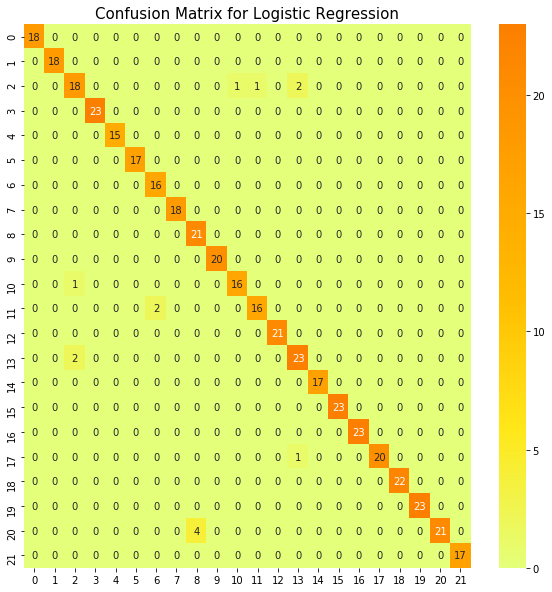

In [20]:
# lets evaluate the Model Performance
from sklearn.metrics import confusion_matrix

# lets print the Confusion matrix first
plt.rcParams['figure.figsize']=(10,10)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot = True, cmap='Wistia')
plt.title('Confusion Matrix for Logistic Regression', fontsize=15)
plt.show()

In [21]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [22]:
prediction = model.predict((np.array([[90,
                                      40,
                                      40,
                                      20,
                                      80,
                                      7,200]])))
print("The Suggested Crop for Given Climatic Condition is:", prediction)

The Suggested Crop for Given Climatic Condition is: ['rice']


In [23]:
import pickle
pickle.dump(model,open('crop1.pkl','wb'))